<a href="https://colab.research.google.com/github/iam-sr13/IN-792-RL/blob/master/%5BGColab%5D%20OpenAI%20Pole%20Balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning Simulation in OpenAI Gym Environment

## 1. CartPole-v1

![ezgif.com-video-to-gif.gif](attachment:ezgif.com-video-to-gif.gif)

In [0]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [2]:
!apt-get install python-opengl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [3]:
!apt-get install x11-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [5]:
!git clone https://github.com/openai/gym.git


fatal: destination path 'gym' already exists and is not an empty directory.


In [6]:
%cd gym

/content/gym


In [7]:
!ls
!pip install -e .

bin		     examples	   LICENSE.md	  scripts   vendor
CODE_OF_CONDUCT.rst  gym	   py.Dockerfile  setup.py  videos
docs		     gym.egg-info  README.rst	  tests
Obtaining file:///content/gym
  Found existing installation: gym 0.15.4
    Can't uninstall 'gym'. No files were found to uninstall.
  Running setup.py develop for gym


In [8]:
import gym 
import random
import math
import time
import numpy as np
import pandas as pd

from IPython import display as ipydisplay
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

env = gym.make("CartPole-v1")
env = gym.wrappers.Monitor(env, './videos/' + str(time.time()) + '/', force = True)
print(env.observation_space)
print(env.action_space)

Box(4,)
Discrete(2)


/content/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [9]:
class Agent():
    def __init__(self, env):
        self.is_discrete = type(env.action_space) == gym.spaces.discrete.Discrete
        self.env_discrete = type(env.observation_space) == gym.spaces.discrete.Discrete
        
        if self.is_discrete:
            self.action_size = env.action_space.n
            print("||Action-Space|| = {}".format(self.action_size))
        else:
            self.action_low = env.action_space.low
            self.action_high = env.action_space.high
            self.action_shape = env.action_space.shape
            print("||Action-Space|| range:", self.action_low, self.action_high)
            
        if self.env_discrete:
            self.state_size = env.observation_space.n
            print("||State-Space|| = {}".format(self.state_size))
        else:
            self.state_low = env.observation_space.low
            self.state_high = env.observation_space.high
            self.state_shape = env.observation_space.shape
            print("||State-Space|| range:", self.state_low, self.state_high)      
        
        self.states = env.observation_space
        self.actions = env.action_space        
    
    def get_action_random(self, state):
        if self.is_discrete:
            action = random.choice(range(self.action_size))
        else:
            action = np.random.uniform(self.action_low, self.action_high, self.action_shape)
        return action
    
    def get_action(self, state):
        pole_angle = state[2]
        action = 0 if pole_angle < 0 else 1
        return action
    
myagent = Agent(env)

||Action-Space|| = 2
||State-Space|| range: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38] [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In State:  [ 0.19857834  0.38322373 -0.20424351 -0.40841855]
Episode 5 done in 37 timesteps!



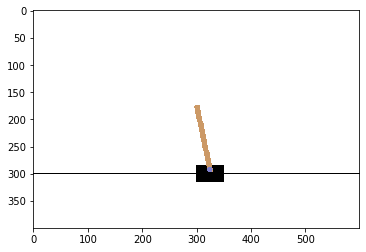

In [10]:
n = int(input("Enter the no. of episodes for simulation: "))

for episode in range(n):
    state = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    for t in range(10000):
        #env.render()
        img.set_data(env.render(mode='rgb_array')) # just update the data
        ipydisplay.display(plt.gcf())
        ipydisplay.clear_output(wait=True)
        print("In State: ", state)
        action = myagent.get_action(state)
        state, reward, done, info = env.step(action)
        if done:
            print("Episode {} done in {} timesteps!\n".format(episode+1, t+1))
            break
    else:
        print("Episode {} NOT done in limit of {} timesteps! Agent Terminated!\n".format(episode+1, t+1))
    
env.close()   

In [11]:
print(env.render(mode='rgb_array'))

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


## Q Learning

![ezgif.com-video-to-gif.gif](attachment:ezgif.com-video-to-gif.gif)

In [12]:
env = gym.make("CartPole-v1")
env = gym.wrappers.Monitor(env, './videos/' + str(time.time()) + '/', force = True)

class QLAgent(Agent):
    def __init__(self, env, size=(1, 1, 6, 12,), discount_rate=0.97, learning_rate=0.01):
        super().__init__(env)        
        
        self.eps = 1.0
        self.discount_rate = discount_rate
        self.learning_rate = learning_rate
        
        self.state_size = size
        
        self.q_table = 1e-4*np.zeros(self.state_size + (self.action_size,))
        print("QTable constructed with size: {}".format(self.q_table.size))
        
    def discretize(self, state):
        upper_bounds = [self.state_high[0], 0.5, self.state_high[2], math.radians(50)]
        lower_bounds = [self.state_low[0], -0.5, self.state_low[2], -math.radians(50)]
        ratios = [(state[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(state))]
        new_obs = [int(round((self.state_size[i] - 1) * ratios[i])) for i in range(len(state))]
        new_obs = [min(self.state_size[i] - 1, max(0, new_obs[i])) for i in range(len(state))]
        return tuple(new_obs)       
        
    def get_action(self, state): #epsilon greedy policy
        state = self.discretize(state)
        q_state = self.q_table[state]
        action_greedy = np.argmax(q_state)
        action_random = super().get_action_random(state)
        return action_random if random.random() < self.eps else action_greedy  
    
    def train(self, experience):
        state, action, next_state, reward, done = experience
        state = self.discretize(state)
        next_state = self.discretize(next_state)
        
        q_next = self.q_table[next_state]
        q_next = np.zeros([self.action_size]) if done else q_next
        q_target = reward + self.discount_rate * np.max(q_next)
        #print((*state,action))
        q_update = q_target - self.q_table[(*state,action)]      #Like TD error
        self.q_table[(*state,action)] += self.learning_rate * q_update #Like TD update
        
        if done:
            self.eps = self.eps * 0.99
        
myagent = QLAgent(env)

||Action-Space|| = 2
||State-Space|| range: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38] [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
QTable constructed with size: 144


/content/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [13]:
n = int(input("Enter the no. of episodes for simulation: "))

total_reward = 0
for ep in range(n):
    state = env.reset()
    for t in range(10000):
        env.render()        
        action = myagent.get_action(state)
        next_state, reward, done, info = env.step(action)     
        
        myagent.train((state,action,next_state,reward,done))
        state = next_state
        total_reward += reward
        
        #print("In State: ", state)   
        #print("In State (Discrete): ", myagent.discretize(state), "Action: ", action)       
        #print("Episode: {}, Total reward: {}, eps: {}".format(ep,total_reward,myagent.eps))
        #print(myagent.q_table)
        #time.sleep(0.05)
        #clear_output(wait=True)
        
        if done:
            print("Episode {} done in {} timesteps! Total reward: {}, eps: {}\n".format(ep+1, t+1, total_reward, myagent.eps))
            break
    else:
        print("Episode {} NOT done in limit of {} timesteps! Agent Terminated!\n".format(ep+1, t+1))  
    
env.close()   

Enter the no. of episodes for simulation: 5
Episode 1 done in 18 timesteps! Total reward: 18.0, eps: 0.99

Episode 2 done in 12 timesteps! Total reward: 30.0, eps: 0.9801

Episode 3 done in 14 timesteps! Total reward: 44.0, eps: 0.9702989999999999

Episode 4 done in 28 timesteps! Total reward: 72.0, eps: 0.96059601

Episode 5 done in 19 timesteps! Total reward: 91.0, eps: 0.9509900498999999



In [14]:
print(myagent.q_table)

[[[[[0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]]

   [[0.         0.01      ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]]

   [[0.02019001 0.03969387]
    [0.         0.        ]
    [0.010097   0.01      ]
    [0.         0.01009794]
    [0.01       0.01      ]
    [0.         0.01      ]
    [0.02979894 0.0199    ]
    [0.02009679 0.010097  ]
    [0.010097   0.        ]
    [0.         0.010097  ]
    [0.         0.        ]
    [0.         

In [15]:
print(myagent.q_table)

[[[[[0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]]

   [[0.         0.01      ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]]

   [[0.02019001 0.03969387]
    [0.         0.        ]
    [0.010097   0.01      ]
    [0.         0.01009794]
    [0.01       0.01      ]
    [0.         0.01      ]
    [0.02979894 0.0199    ]
    [0.02009679 0.010097  ]
    [0.010097   0.        ]
    [0.         0.010097  ]
    [0.         0.        ]
    [0.         

## Larger Q-Table

>1. During Training
![ezgif.com-video-to-gif%20%281%29.gif](attachment:ezgif.com-video-to-gif%20%281%29.gif)

>2. After Training for 100 episodes
![ezgif.com-video-to-gif.gif](attachment:ezgif.com-video-to-gif.gif)

In [16]:
env = gym.make("CartPole-v1")
env = gym.wrappers.Monitor(env, './videos/' + str(time.time()) + '/',video_callable=lambda episode_id: True, force = True)

myagent = QLAgent(env, size=(2, 2, 24, 48,), discount_rate=0.97, learning_rate=0.01)

n = int(input("Enter the no. of episodes for simulation: "))

total_reward = 0
for ep in range(n):
    state = env.reset()
    for t in range(10000):
        env.render()        
        action = myagent.get_action(state)
        next_state, reward, done, info = env.step(action)     
        
        myagent.train((state,action,next_state,reward,done))
        state = next_state
        total_reward += reward
        
        #print("In State: ", state)   
        #print("In State (Discrete): ", myagent.discretize(state), "Action: ", action)       
        #print("Episode: {}, Total reward: {}, eps: {}".format(ep,total_reward,myagent.eps))
        #print(myagent.q_table)
        #time.sleep(0.05)
        #clear_output(wait=True)
        
        if done:
            print("Episode {} done in {} timesteps! Total reward: {}, eps: {}\n".format(ep+1, t+1, total_reward, myagent.eps))
            break
    else:
        print("Episode {} NOT done in limit of {} timesteps! Agent Terminated!\n".format(ep+1, t+1))  
    
env.close()   

/content/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


||Action-Space|| = 2
||State-Space|| range: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38] [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
QTable constructed with size: 9216
Enter the no. of episodes for simulation: 5
Episode 1 done in 12 timesteps! Total reward: 12.0, eps: 0.99

Episode 2 done in 29 timesteps! Total reward: 41.0, eps: 0.9801

Episode 3 done in 19 timesteps! Total reward: 60.0, eps: 0.9702989999999999

Episode 4 done in 14 timesteps! Total reward: 74.0, eps: 0.96059601

Episode 5 done in 18 timesteps! Total reward: 92.0, eps: 0.9509900498999999

